In [11]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [39]:
df1 = pd.read_csv('data/ventas.csv', delimiter=';')
df1.head()

,pies,precio_venta,precio_costo,fecha,numero_doc,estado,motivo,punto,total_doc,descripcion_larga
0,5.3,1.6,1.2,2011-07-14 00:00:00.000,1,1,V,1,40.2,MADERA CATAHUA
1,7.0,1.6,1.2,2011-07-14 00:00:00.000,1,1,V,1,40.2,MADERA CATAHUA
2,6.0,1.6,1.2,2011-07-14 00:00:00.000,1,1,V,1,40.2,MADERA CATAHUA
3,5.3,1.6,1.2,2011-07-14 00:00:00.000,1,1,V,1,40.2,MADERA CATAHUA
4,1.5,1.6,1.2,2011-07-14 00:00:00.000,1,1,V,1,40.2,MADERA CATAHUA


In [40]:
df1['importe'] = df1['pies'] * df1['precio_venta']
df1.head()

,pies,precio_venta,precio_costo,fecha,numero_doc,estado,motivo,punto,total_doc,descripcion_larga,importe
0,5.3,1.6,1.2,2011-07-14 00:00:00.000,1,1,V,1,40.2,MADERA CATAHUA,8.48
1,7.0,1.6,1.2,2011-07-14 00:00:00.000,1,1,V,1,40.2,MADERA CATAHUA,11.20
2,6.0,1.6,1.2,2011-07-14 00:00:00.000,1,1,V,1,40.2,MADERA CATAHUA,9.60
3,5.3,1.6,1.2,2011-07-14 00:00:00.000,1,1,V,1,40.2,MADERA CATAHUA,8.48
4,1.5,1.6,1.2,2011-07-14 00:00:00.000,1,1,V,1,40.2,MADERA CATAHUA,2.40


In [41]:
# Ver el formato de cada columna
print(df1.dtypes)

pies                 float64
precio_venta         float64
precio_costo         float64
fecha                 object
numero_doc             int64
estado                 int64
motivo                object
punto                  int64
total_doc            float64
descripcion_larga     object
importe              float64
dtype: object


In [42]:
# Dar formato de fecha a la comulna de fecha
df1['fecha'] = pd.to_datetime(df1['fecha'])

In [43]:
# Ver valores NaN
cantidad_nan_por_columnas = df1.isna().sum(axis=0)

print("Cantidad de valores NaN por columnas:")
print(cantidad_nan_por_columnas)


Cantidad de valores NaN por columnas:
pies                  0
precio_venta          0
precio_costo          1
fecha                 0
numero_doc            0
estado                0
motivo                0
punto                 0
total_doc             0
descripcion_larga    27
importe               0
dtype: int64


In [44]:
df1 = df1.dropna()

In [45]:
# Verificar si la carpeta existe, si no, crearla :) 
carpeta = "visualisaciones"
if not os.path.exists(carpeta):
    os.makedirs(carpeta)

# Agrupar el importe por fecha $$
df_suma_importe1 = df1.groupby("fecha")["importe"].sum().reset_index()

# Gráfico de líneas
fig2 = px.line(df_suma_importe1, x="fecha", y="importe", title="Evolución de las ventas")

# Guardar el gráfico en un archivo HTML en la carpeta especificada 
ruta_grafico = os.path.join(carpeta, "grafico_importe1.html")
fig2.write_html(ruta_grafico)

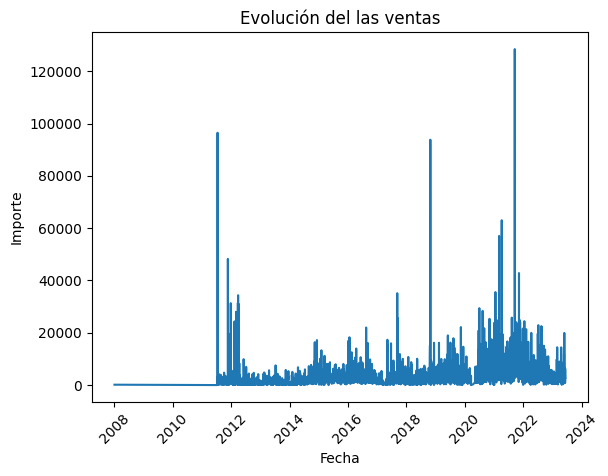

In [46]:
# Igual que antes XD 
# Crea el gráfico de líneas
plt.plot(df_suma_importe1['fecha'], df_suma_importe1['importe'])
plt.xlabel('Fecha')
plt.ylabel('Importe')
plt.title('Evolución del las ventas')
plt.xticks(rotation=45)
plt.show()

In [47]:
# (son valores de prueba que no se borraron) ¿como lo se?  sera nuestro secreto ;)
valores_a_eliminar = [1, 3182, 3246, 2655, 2658, 2702, 2701, 2666]
df1 = df1[~df1['numero_doc'].isin(valores_a_eliminar)]


In [52]:
# Ventas del 2008???   
df_suma_importe1.head()

,fecha,importe
0,2008-01-01,154.48
1,2011-07-12,11.40
2,2011-07-13,653.78
3,2011-07-14,96475.00
4,2011-07-15,280.31


In [55]:
filtro_fecha = df1['fecha'] == '2008-01-01'
df_filtrado = df1[filtro_fecha]
df_filtrado

,pies,precio_venta,precio_costo,fecha,numero_doc,estado,motivo,punto,total_doc,descripcion_larga,importe
121283,60.0,1.9,1.85,2008-01-01,9357,1,V,1,154.5,CATAHUA 60,114.00
121284,18.4,2.2,1.40,2008-01-01,9357,1,V,1,154.5,CATAHUA 60,40.48


In [57]:
# Los eliminamos porque el registro inicia el 2011, son datos basura
df1 = df1.drop([121283, 121284]).reset_index(drop=True)

In [61]:
# Calcular el importe por fecha
df_suma_importe = df1.groupby("fecha")["importe"].sum().reset_index()

# Crear el gráfico de líneas
fig = px.line(df_suma_importe, x="fecha", y="importe", title="Evolución de la Suma del Importe")

# Guardar el gráfico en un archivo HTML
ruta_grafico = os.path.join(carpeta, "grafico_importe2.html")
fig.write_html(ruta_grafico)

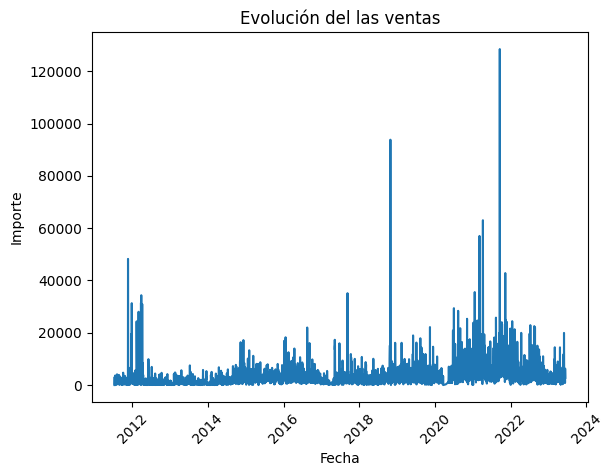

In [63]:
# Igual que antes XD 
# Crea el gráfico de líneas
plt.plot(df_suma_importe['fecha'], df_suma_importe['importe'])
plt.xlabel('Fecha')
plt.ylabel('Importe')
plt.title('Evolución del las ventas')
plt.xticks(rotation=45)
plt.show()